# Demo version 06.05.2022

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import lusi_Andreas_Loehr as lal

2022-05-14 22:52:00.479186: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Load functinos into global namespace
modify_metric = lal.modify_metric

## Load Data

In [3]:
# Load dataset, set batch size.
batch_size = 64
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Prep train dataset.
eights = x_train[y_train == 8]/255
sevens = x_train[y_train == 7]/255

y_eights = np.ones(eights.shape[0])
y_sevens = np.zeros(sevens.shape[0])

# not needed as 
# eights_flat = np.reshape(eights, (-1, 784))
# sevens_flat = np.reshape(sevens, (-1, 784))
# x_train = np.concatenate([eights_flat, sevens_flat])

x_train_2d = np.concatenate([eights, sevens])
y_train = np.concatenate([y_eights, y_sevens])

In [6]:
# Dim checks.
print(f"Shape of 'eights' data: {eights.shape}")
print(f"Shape of 'sevens' data: {sevens.shape}")
print(f"Shape of entire training dataset: {x_train_2d.shape}")
print(f"Shape of training dataset labels: {y_train.shape}")

Shape of 'eights' data: (5851, 28, 28)
Shape of 'sevens' data: (6265, 28, 28)
Shape of entire training dataset: (12116, 28, 28)
Shape of training dataset labels: (12116,)


In [7]:
# Prep test dataset.
eights_test = x_test[y_test == 8]/255
sevens_test = x_test[y_test == 7]/255

y_eights_test = np.ones(eights_test.shape[0])
y_sevens_test = np.zeros(sevens_test.shape[0])

x_test = np.concatenate([eights_test, sevens_test])
y_test = np.concatenate([y_eights_test, y_sevens_test])

In [8]:
# Dim checks.
print(f"Shape of 'eights' test data: {eights_test.shape}")
print(f"Shape of 'sevens' test data: {sevens_test.shape}")
print(f"Shape of entire test dataset: {x_test.shape}")
print(f"Shape of entire test dataset labels: {y_test.shape}")

Shape of 'eights' test data: (974, 28, 28)
Shape of 'sevens' test data: (1028, 28, 28)
Shape of entire test dataset: (2002, 28, 28)
Shape of entire test dataset labels: (2002,)


In [9]:
# Load numpy array of predicate functions
preds = lal.phi
preds

array([<function avg_pixel_intensity at 0x19c556200>,
       <function weighted_pixel_intesity at 0x19c5563b0>,
       functools.partial(<function local_pixel_intensity_single at 0x19c556440>, patch=((10, 20), (10, 20)))],
      dtype=object)

In [10]:
# Evaluate predicates on training data
pred_eval = lal.apply_predicates_on_data(preds, x_train_2d)
pred_eval_test = lal.apply_predicates_on_data(preds, x_test)

2022-05-12 09:24:54.358384: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Dim checks.
print(f"Type of pred_eval is: {type(pred_eval)}\n")
print(f"Shape of pred_eval is: {pred_eval.shape}. This is the result of applying {preds.shape[0]} predicates on the training data.\n")
print(f"Shape of pred_eval_test is: {pred_eval_test.shape}. This is the result of applying {preds.shape[0]} predicates on the test data.\n")
print(f"Shape of train dataset is: {x_train_2d.shape}")
print(f"Shape of training labels is: {y_train.shape}")

Type of pred_eval is: <class 'tensorflow.python.framework.ops.EagerTensor'>

Shape of pred_eval is: (12116, 3). This is the result of applying 3 predicates on the training data.

Shape of pred_eval_test is: (2002, 3). This is the result of applying 3 predicates on the test data.

Shape of train dataset is: (12116, 28, 28)
Shape of training labels is: (12116,)


In [12]:
# Batch training dataset and prepare for training with custom lusi loss.
# Important: Set reminder to true, else B in custom training loop might greater than batch_size of last batch.
train_dataset = tf.data.Dataset.from_tensor_slices((pred_eval, x_train_2d, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size, drop_remainder=True)

### Zipped train datasets

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((pred_eval, x_train_2d, y_train))
train_dataset_b = train_dataset.shuffle(buffer_size=1024).batch(64, drop_remainder=True)
train_dataset_b_prime = train_dataset.shuffle(buffer_size=1024).batch(54, drop_remainder=True)
train_batch = tf.data.Dataset.zip((train_dataset_b, train_dataset_b_prime))

In [17]:
# size_s = Periphery((x_train_2d, y_train), (x_test, y_test), n_train=600, phi=lal.phi, batch_size_1=64, batch_size_2=64)
# size_m = Periphery((x_train_2d, y_train), (x_test, y_test), n_train=2000, phi=lal.phi, batch_size_1=64, batch_size_2=64)
# size_l = Periphery((x_train_2d, y_train), (x_test, y_test), phi=lal.phi, batch_size_1=64, batch_size_2=64)

In [18]:
# size_s.class_balance
# size_l.train_data_batched_p

In [403]:
# lp = LusiPeriphery(train_data=(x_train_2d, y_train))
# lp.set_phi(lal.phi)

In [404]:
# ds = lp.generate_batch_data()

In [19]:
# Dim checks.
i = 0
for b, b_ in train_batch:
    if i < 2:
        print(f"Train batch 1 dimensions for batch number {i}: {b[0].shape, b[1].shape, b[2].shape}")
        print(f"Train batch 2 dimensions for batch number {i}: {b_[0].shape, b_[1].shape, b_[2].shape}")
        i+=1

Train batch 1 dimensions for batch number 0: (TensorShape([64, 3]), TensorShape([64, 28, 28]), TensorShape([64]))
Train batch 2 dimensions for batch number 0: (TensorShape([54, 3]), TensorShape([54, 28, 28]), TensorShape([54]))
Train batch 1 dimensions for batch number 1: (TensorShape([64, 3]), TensorShape([64, 28, 28]), TensorShape([64]))
Train batch 2 dimensions for batch number 1: (TensorShape([54, 3]), TensorShape([54, 28, 28]), TensorShape([54]))


In [15]:
a = tf.Variable(np.ones(shape=(2,3)))
b = tf.Variable(2 * np.ones(shape=(4,3)))
c = tf.concat([a,b], axis=0)
c

<tf.Tensor: shape=(6, 3), dtype=float64, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])>

In [20]:
for step, ((pred_batch_1, x_batch_train_1, y_batch_train_1), (pred_batch_2, x_batch_train_2, y_batch_train_2))  in enumerate(train_batch):
    if step <= 1:
        print(f"\nShapes for batches of step {step}:")
        print(f"Predicates batch 1 have shape {pred_batch_1.shape}")
        print(f"Predicates batch 2 have shape {pred_batch_2.shape}")
        print(f"x values batch 1 have shape {x_batch_train_1.shape}")
        print(f"x values batch 2 have shape {x_batch_train_2.shape}")
        print(f"y values batch 1 have shape {y_batch_train_1.shape}")
        print(f"y values batch 2 have shape {y_batch_train_2.shape}")


Shapes for batches of step 0:
Predicates batch 1 have shape (64, 3)
Predicates batch 2 have shape (54, 3)
x values batch 1 have shape (64, 28, 28)
x values batch 2 have shape (54, 28, 28)
y values batch 1 have shape (64,)
y values batch 2 have shape (54,)

Shapes for batches of step 1:
Predicates batch 1 have shape (64, 3)
Predicates batch 2 have shape (54, 3)
x values batch 1 have shape (64, 28, 28)
x values batch 2 have shape (54, 28, 28)
y values batch 1 have shape (64,)
y values batch 2 have shape (54,)


In [21]:
# Batch test dataset and prepare for evaluation with custom lusi loss.
# Important: Set reminder to true, else B in custom training loop might greater than batch_size of last batch.
test_dataset = tf.data.Dataset.from_tensor_slices((pred_eval_test, x_test, y_test))
# test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(batch_size, drop_remainder=True)

In [22]:
# Dim checks.
i = 0
for b, b_ in zip(train_dataset, test_dataset):
    if i < 2:
        print(f"Train batch dimensions for batch number {i}: {b[0].shape, b[1].shape, b[2].shape}")
        print(f"Test batch dimensions for batch number {i}: {b_[0].shape, b_[1].shape, b_[2].shape}")
        i+=1
    

Train batch dimensions for batch number 0: (TensorShape([3]), TensorShape([28, 28]), TensorShape([]))
Test batch dimensions for batch number 0: (TensorShape([64, 3]), TensorShape([64, 28, 28]), TensorShape([64]))
Train batch dimensions for batch number 1: (TensorShape([3]), TensorShape([28, 28]), TensorShape([]))
Test batch dimensions for batch number 1: (TensorShape([64, 3]), TensorShape([64, 28, 28]), TensorShape([64]))


In [23]:
# train and testset for baseline model
train_dataset_baseline = tf.data.Dataset.from_tensor_slices((x_train_2d, y_train))
train_dataset_baseline = train_dataset_baseline.shuffle(buffer_size=1024).batch(batch_size, drop_remainder=True)

test_dataset_baseline = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset_baseline = test_dataset_baseline.shuffle(buffer_size=1024).batch(batch_size, drop_remainder=False)

In [24]:
# Dim checks.
i = 0
for b, b_ in zip(train_dataset_baseline, test_dataset_baseline):
    if i < 2:
        print(f"Train batch dimensions for batch number {i}: {b[0].shape, b[1].shape}")
        print(f"Test batch dimensions for batch number {i}: {b_[0].shape, b_[1].shape}")
        i+=1
    

Train batch dimensions for batch number 0: (TensorShape([64, 28, 28]), TensorShape([64]))
Test batch dimensions for batch number 0: (TensorShape([64, 28, 28]), TensorShape([64]))
Train batch dimensions for batch number 1: (TensorShape([64, 28, 28]), TensorShape([64]))
Test batch dimensions for batch number 1: (TensorShape([64, 28, 28]), TensorShape([64]))


## Models

### Baseline model - standard neural net

In [63]:
# Baseline model
baseline_bin_class = keras.Sequential(
[
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(100, activation="relu", name="hidden_layer_1"),
    # layers.Dense(500, activation="relu", name="hidden_layer_2"),
    layers.Dense(1, activation="sigmoid", name="output_layer") # interpret output as prob. for class 1
    # layers.Dense(1, name="output_layer", activation="relu")
])

In [64]:
baseline_bin_class.compile(
    optimizer=keras.optimizers.SGD(),
    # loss=keras.losses.SparseCategoricalCrossentropy(),
    # loss=keras.losses.binary_crossentropy(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(), "accuracy"],
)

In [571]:
# Model summary
baseline_bin_class.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 100)               78500     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 78,601
Trainable params: 78,601
Non-trainable params: 0
_________________________________________________________________


In [575]:
# Evaluate baseline model on test set with no training.
# baseline_bin_class.evaluate(x_test, y_test, batch_size=x_test.shape[0])
baseline_bin_class.evaluate(size_m.test_data[0], size_m.test_data[1], batch_size=size_m.test_data[0].shape[0])

1/1 [==============================] - 0s 21ms/step - loss: 0.0530 - binary_accuracy: 0.9795 - accuracy: 0.9795


[0.05300832539796829, 0.9795204997062683, 0.9795204997062683]

In [26]:
# temp = np.mean(np.round(baseline_bin_class(x_test)[0]) == y_test)
temp = np.mean(tf.round(baseline_bin_class(x_test)[:, 0]) == y_test)

In [28]:
temp

0.6398601398601399

In [574]:
# Train baseline model for 10 epochs.
baseline_bin_class.fit(x_train_2d, y_train, batch_size=64, epochs=10)

Epoch 1/10
190/190 [==============================] - 0s 964us/step - loss: 0.2655 - binary_accuracy: 0.9520 - accuracy: 0.9520
Epoch 2/10
190/190 [==============================] - 0s 998us/step - loss: 0.1045 - binary_accuracy: 0.9787 - accuracy: 0.9787
Epoch 3/10
190/190 [==============================] - 0s 1ms/step - loss: 0.0760 - binary_accuracy: 0.9817 - accuracy: 0.9817
Epoch 4/10
190/190 [==============================] - 0s 1ms/step - loss: 0.0629 - binary_accuracy: 0.9844 - accuracy: 0.9844
Epoch 5/10
190/190 [==============================] - 0s 1ms/step - loss: 0.0550 - binary_accuracy: 0.9859 - accuracy: 0.9859
Epoch 6/10
190/190 [==============================] - 0s 1ms/step - loss: 0.0496 - binary_accuracy: 0.9866 - accuracy: 0.9866
Epoch 7/10
190/190 [==============================] - 0s 1ms/step - loss: 0.0456 - binary_accuracy: 0.9873 - accuracy: 0.9873
Epoch 8/10
190/190 [==============================] - 0s 1ms/step - loss: 0.0424 - binary_accuracy: 0.9877 - accur

In [30]:
# Evaluate trained baseline model on test set.
baseline_bin_class.evaluate(x_test, y_test, batch_size=x_test.shape[0])

1/1 [==============================] - 0s 20ms/step - loss: 0.0530 - binary_accuracy: 0.9800 - accuracy: 0.9800


[0.053045302629470825, 0.9800199866294861, 0.9800199866294861]

#### Remarks:
One can recognize an improvement during training as well in the pre training evaluation score and the post training eval score.

### Custom model - standard neural net with custom LUSI training loss

In [576]:
weight_matrix = tf.cast(tf.linalg.diag(np.ones(len(preds))), dtype=tf.float32)

In [577]:
weight_matrix

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [589]:
# Note: The predicat evaluations are part of the dataset, thus predicates=None
lusi_net = lal.LusiModel(m_inner_prod=weight_matrix)
lusi_net.add_optimizer(tf.keras.optimizers.SGD())

In [590]:
lusi_net.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 hidden_layer_01 (Dense)     (None, 100)               78500     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 78,601
Trainable params: 78,601
Non-trainable params: 0
_________________________________________________________________


In [614]:
# Specify some evaluation metrics for custom model
eval_metrics = [modify_metric(tf.keras.metrics.BinaryAccuracy(name="Binary Accuracy"), "pred_and_true"), 
                modify_metric(tf.keras.metrics.FalsePositives(name="False Positives"), "pred_and_true"), 
                modify_metric(tf.keras.metrics.FalseNegatives(name="False Negatives"), "pred_and_true"), 
                modify_metric(tf.keras.metrics.Precision(name="Precision"), "pred_and_true"), 
                modify_metric(tf.keras.metrics.Recall(name="Recall"), "pred_and_true"),
                # modify_metric(tf.keras.metrics.Mean(name="Mean"), "loss"),
                # modify_metric(tf.keras.metrics.Accuracy(), "pred_and_true")
               ]

In [624]:
for eval_metric in eval_metrics:
    eval_metric.reset_state()
    print(eval_metric.result())

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [625]:
lusi_net.evaluate(size_s.test_data, eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.964036>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=41.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=31.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.9583333>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.9681725>)]

In [627]:
size_s.test_data[0].shape, size_s.test_data[1].shape 

((2002, 28, 28), (2002,))

In [598]:
lusi_net.train_correct(size_l.train_data_batched_p, num_epochs=10, train_metrics=eval_metrics)
# lusi_net.train_correct(train_batch, num_epochs=10, train_metrics=eval_metrics)


Start of epoch 0
Training loss (for one batch) at step 0: -1.1592
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.8662
Seen so far: 6464 samples

Start of epoch 1
Training loss (for one batch) at step 0: -0.7866
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.3673
Seen so far: 6464 samples

Start of epoch 2
Training loss (for one batch) at step 0: -1.1022
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.2539
Seen so far: 6464 samples

Start of epoch 3
Training loss (for one batch) at step 0: -0.8287
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.1920
Seen so far: 6464 samples

Start of epoch 4
Training loss (for one batch) at step 0: -0.6916
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.1425
Seen so far: 6464 samples

Start of epoch 5
Training loss (for one batch) at step 0: -0.4747
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.1145
Seen so far: 6464 sample

In [621]:
lusi_net.evaluate(size_s.test_data, eval_metrics)
#lusi_net.evaluate((x_test, y_test), eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.964036>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=41.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=31.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.9583333>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.9681725>)]

In [617]:
size_l.test_data[0].shape, size_l.test_data[1].shape

((2002, 28, 28), (2002,))

In [610]:
# lusi_net.evaluate_testset(x_test, y_test, eval_metrics)

In [611]:
lusi_net.evaluate(test_dataset, eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.9642137>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=41.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=30.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.9580777>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.9689762>)]

In [356]:
 1- (902 + 295)/2002

0.4020979020979021

In [373]:
# Pre training evaluation on test dataset (Calculate scores for each batch and average over batches)
# Caution: Evaluation for 'Mean' metric not yet implemented.
lusi_net.evaluate(test_dataset, eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.2998992>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=562.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=827.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.1994302>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.14477766>),
 ('accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.2998992>)]

In [358]:
test_dataset

<BatchDataset shapes: ((64, 3), (64, 28, 28), (64,)), types: (tf.float32, tf.float64, tf.float64)>

In [370]:
y_pred_test_temp = lusi_net.predict(x_test)
y_pred_test_temp = np.asarray([j[0] for j in y_pred_test_temp])
y_pred_test_temp
np.mean(np.round(y_pred_test_temp) ==  y_test )

0.3006993006993007

In [380]:
lusi_net.train_correct(train_batch, 5, train_metrics=eval_metrics)


Start of epoch 0
Training loss (for one batch) at step 0: -1.1331
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.9742
Seen so far: 6464 samples

Start of epoch 1
Training loss (for one batch) at step 0: -0.8624
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.5927
Seen so far: 6464 samples

Start of epoch 2
Training loss (for one batch) at step 0: -1.0895
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.1699
Seen so far: 6464 samples

Start of epoch 3
Training loss (for one batch) at step 0: -0.6861
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.0951
Seen so far: 6464 samples

Start of epoch 4
Training loss (for one batch) at step 0: -0.8297
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.1503
Seen so far: 6464 samples


In [381]:
lusi_net.evaluate((x_test, y_test), eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.95254743>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=46.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=49.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.95262617>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.949692>),
 ('accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.95254743>)]

In [382]:
y_pred_test_temp = lusi_net.predict(x_test)
y_pred_test_temp = np.asarray([j[0] for j in y_pred_test_temp])
y_pred_test_temp
np.mean(np.round(y_pred_test_temp) ==  y_test )

0.9525474525474525

In [291]:
1 - 221/2002

0.8896103896103896

In [383]:
lusi_net.evaluate(test_dataset, eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.952621>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=45.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=49.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.95327103>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.9493278>),
 ('accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.952621>)]

In [385]:
1 - (46+49)/2002

0.9525474525474525

In [56]:
# Train custom model for 10 epochs
# lusi_net.train(train_dataset, 10, train_metrics=eval_metrics,  batch_1_size=32)

In [295]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [299]:
train_dataset.dtype

AttributeError: 'TensorSliceDataset' object has no attribute 'dtype'

In [307]:
isinstance(train_dataset, tf.data.Dataset)
isinstance(x_test, np.ndarray)

True

In [386]:
# Inspection of training progress
# Epoch -1 is evaluation before first gradient update in epoch 0
for j,e in enumerate(lusi_net.epoch_train_metrics_results):
    print(f"----- Epoch {j-1} -----")
    for i in e:
        print(f"{i[0]}: {i[1]}")

----- Epoch -1 -----
Binary Accuracy: 0.29449981451034546
False Positives: 562.0
False Negatives: 930.0
Precision: 0.2161785215139389
Recall: 0.1428571492433548
accuracy: 0.29019981622695923
----- Epoch 0 -----
Binary Accuracy: 0.7587069272994995
False Positives: 3986.0
False Negatives: 1106.0
Precision: 0.7435006499290466
Recall: 0.912638247013092
accuracy: 0.7903319001197815
----- Epoch 1 -----
Binary Accuracy: 0.9079453945159912
False Positives: 1608.0
False Negatives: 445.0
Precision: 0.8749416470527649
Recall: 0.9619495272636414
accuracy: 0.907945454120636
----- Epoch 2 -----
Binary Accuracy: 0.9568645358085632
False Positives: 822.0
False Negatives: 140.0
Precision: 0.9336133003234863
Recall: 0.988034188747406
accuracy: 0.9568648338317871
----- Epoch 3 -----
Binary Accuracy: 0.9620657563209534
False Positives: 729.0
False Negatives: 117.0
Precision: 0.9407846927642822
Recall: 0.9899991154670715
accuracy: 0.9620661735534668
----- Epoch 4 -----
Binary Accuracy: 0.9634556174278259
F

In [387]:
lusi_net.evaluate(test_dataset, eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.9521169>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=46.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=49.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.9522326>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.9492754>),
 ('accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.9521169>)]

In [375]:
lusi_net_test_pred = np.round(lusi_net.predict(x_test))
preds_y_test = np.asarray([j[0] for j in lusi_net_test_pred])

In [376]:
1- (22 + 629)/2002

0.6748251748251748

In [377]:
preds_y_test.shape

(2002,)

In [378]:
np.mean(preds_y_test == y_test)

0.3006993006993007

#### Visual validation

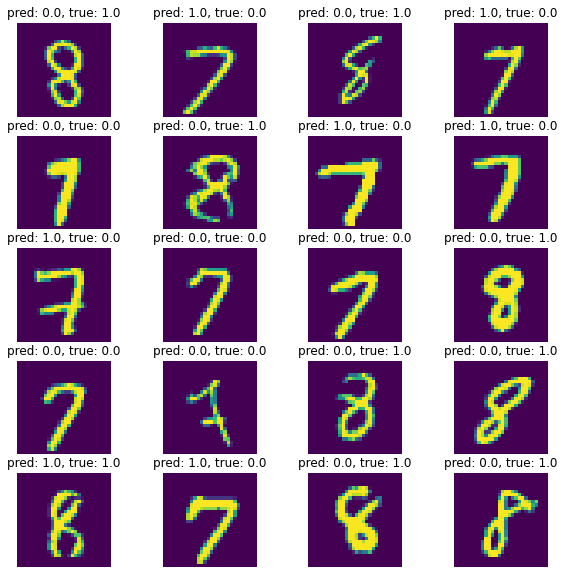

In [379]:
random_indices = np.random.randint(0, high=x_test.shape[0], size=20).reshape(5,4)
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(10,10))
fig.figsize=(10,10)

for i in range(5):
    for j in range(4):
        ax[i,j].imshow(x_test[random_indices[i,j]])
        ax[i,j].set_title(f"pred: {lusi_net_test_pred[random_indices[i,j]][0]}, true: {y_test[random_indices[i,j]]}")
        ax[i,j].axis("off")

In [207]:
lusi_net.watches_vars

(<tf.Variable 'hidden_layer_01/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[ 0.01029615,  0.07308923,  0.0528736 , ...,  0.01764344,
          0.03428844,  0.06806841],
        [ 0.04321082, -0.03620856, -0.07285321, ...,  0.00256582,
          0.01069878,  0.01379132],
        [-0.01839224, -0.00344887, -0.04425785, ..., -0.03740519,
          0.0312849 , -0.04990429],
        ...,
        [-0.06186682,  0.0360487 ,  0.07773726, ..., -0.03847785,
         -0.07957546, -0.02448065],
        [ 0.05378409, -0.07762517,  0.04541375, ...,  0.03921954,
          0.07320769,  0.00610677],
        [ 0.05557923, -0.00094198, -0.05384734, ..., -0.02304952,
          0.0453769 , -0.02132869]], dtype=float32)>,
 <tf.Variable 'hidden_layer_01/bias:0' shape=(100,) dtype=float32, numpy=
 array([ 2.26809527e-04,  3.96134565e-03, -4.38527612e-04, -5.05398260e-04,
         4.54691658e-03, -2.63975060e-04, -2.56159110e-04, -3.66585399e-03,
        -8.84142704e-03,  2.18607159e-03, -4.288167

In [240]:
temp = (lusi_net.model_weight_list[4][1][0] - lusi_net.model_weight_list[15][1][0])

In [245]:
print(np.max(temp[temp != 0]))
print(np.min(temp[temp != 0]))


0.0033567557
-0.004465893


In [230]:
lusi_net.layers[0].get_weights()

[array([[ 4.8890710e-05,  3.0188531e-02, -4.0214725e-02, ...,
         -1.3065308e-02, -2.8753571e-02, -4.9196303e-02],
        [-7.3631488e-02,  4.3032289e-02, -6.9208182e-02, ...,
         -7.8303888e-02,  2.5965855e-02,  5.5982769e-02],
        [ 4.7780767e-02, -6.9650389e-02, -3.1469338e-02, ...,
          1.7053321e-02, -2.0180274e-02,  6.0287729e-02],
        ...,
        [ 4.6156347e-02, -1.6654171e-02, -1.3102941e-02, ...,
          3.8317069e-02,  4.9839109e-02, -4.5718636e-02],
        [-5.2456081e-02,  7.4608058e-02, -2.8712895e-02, ...,
         -2.5966190e-02, -2.2572141e-02, -4.1668400e-02],
        [ 7.1549192e-02,  1.4410384e-02, -4.1738898e-02, ...,
         -5.7290137e-02,  4.4993132e-02,  1.8160544e-02]], dtype=float32),
 array([ 5.7783659e-04, -1.3924793e-03, -5.2779360e-04, -4.4235124e-04,
        -1.4338095e-03, -5.7914876e-05,  1.1531371e-02, -2.4699224e-03,
         2.2904804e-02,  5.6161243e-05,  3.2234148e-04, -4.1506483e-04,
         4.5874060e-04,  1.7970765

In [178]:
lusi_net.model_weight_list[4]

((0, 3),
 ListWrapper([array([[-0.03290785, -0.0049599 , -0.06872204, ..., -0.02190971,
          0.04855919,  0.048613  ],
        [-0.04266789, -0.03542301,  0.02982783, ..., -0.06789184,
          0.01476679,  0.01816675],
        [-0.0708926 ,  0.00394389,  0.0236842 , ...,  0.05096431,
         -0.05892266,  0.06849761],
        ...,
        [ 0.0201686 ,  0.04717921,  0.0217082 , ..., -0.0435766 ,
         -0.02208497, -0.08158264],
        [-0.00258563,  0.05347441,  0.02945437, ..., -0.05903338,
          0.02728259,  0.06087816],
        [-0.05981946, -0.0771868 , -0.03381646, ...,  0.03348702,
         -0.07569855, -0.07999133]], dtype=float32), array([ 4.5682047e-04,  3.8227742e-03,  5.5619900e-04, -5.8357842e-04,
        -1.4825790e-04, -1.0391799e-03, -5.1099993e-04, -1.0579149e-03,
         1.1329939e-04,  2.3807606e-03, -1.0065484e-03, -2.8342973e-03,
         2.6445771e-03, -1.3772832e-03, -3.7042033e-03,  2.5061311e-04,
         3.0714814e-03,  1.5233811e-03,  2.200921

### Temporary Issues - old implementation -> ignore

**Issue no 1.**

Während des Trainings kann man einsehen, dass alle Modellparameter des neuronales Netztes vom gradient tape beobachtet werden. Problematisch ist alelrdings, dass man für die erste Matrix von der Dim (784, 100) des ersten Layers immer 0 als Gradienten erhält. Die restlichen Gradienten sind nicht 0.

**Geklärt!!!** Ist beim neuen Modell nicht mehr so...

Trotzdem gut zur Illustration

In [174]:
lusi_net = lal.LusiModel(predicates=None, weight_matrix=weight_matrix)
lusi_net.add_optimizer(tf.keras.optimizers.SGD())
lusi_net.evaluate(test_dataset, eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.8142556>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=848.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=274.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.83850694>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.9414154>),
 ('Mean', <tf.Tensor: shape=(), dtype=float32, numpy=-0.24690153>),
 ('accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.80301964>)]

In [175]:
# Train custom model for 10 epochs
lusi_net.train_debug(train_dataset, 5, train_metrics=eval_metrics,  batch_1_size=32)


Start of epoch 0
Training loss (for one batch) at step 0: -1.1264
Seen so far: 64 samples
Training loss (for one batch) at step 100: 1.2990
Seen so far: 6464 samples

Start of epoch 1
Training loss (for one batch) at step 0: -0.6952
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.3608
Seen so far: 6464 samples

Start of epoch 2
Training loss (for one batch) at step 0: -1.1882
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.1167
Seen so far: 6464 samples

Start of epoch 3
Training loss (for one batch) at step 0: -0.8993
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.2571
Seen so far: 6464 samples

Start of epoch 4
Training loss (for one batch) at step 0: -0.6263
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.1625
Seen so far: 6464 samples


In [186]:
lusi_net.model_weight_list[0]

(-1,
 ListWrapper([<tf.Variable 'hidden_layer_01/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[-0.0370429 ,  0.01856136,  0.01109488, ..., -0.00165075,
         -0.04981851, -0.03788538],
        [-0.08224574, -0.0169937 , -0.06788497, ..., -0.04744552,
         -0.07561758, -0.00373816],
        [-0.03309216, -0.0767751 ,  0.02286159, ...,  0.04550548,
          0.01688451, -0.04940302],
        ...,
        [-0.01363045,  0.0018331 ,  0.00059545, ..., -0.05137364,
          0.01653846,  0.01442146],
        [-0.06955153,  0.06206992, -0.02738059, ...,  0.05478401,
          0.02380726,  0.07367747],
        [-0.0182959 , -0.0309881 , -0.06341801, ..., -0.08149514,
          0.062833  , -0.03134453]], dtype=float32)>, <tf.Variable 'hidden_layer_01/bias:0' shape=(100,) dtype=float32, numpy=
 array([ 1.1756525e-02,  1.1458894e-02,  5.1763508e-04,  1.1784678e-03,
         2.3810772e-04, -7.2968501e-04,  1.9484211e-02,  6.7639253e-03,
        -3.4178586e-03, -2.4401019e-03,  2

In [179]:
diff_grad = (lusi_net.gradient_list[0][1][0] - lusi_net.gradient_list[50][1][0]).numpy()

In [181]:
np.max(diff_grad)

0.086509906

In [182]:
np.min(diff_grad)

-0.080651

In [100]:
diff_grad[diff_grad != 0].shape

(37018,)

In [102]:
(lusi_net.gradient_list[0][1][0]).numpy().shape

(784, 100)

**Issue no 2.**

Der Optimizer führt die Gradientenupdates nicht durch. Das Modell scheint aber ja, wie man sieht, dennoch angepasst zu werden.



In [187]:
print(f"Weights for epoch {lusi_net.model_weight_list[1][0][0]} step {lusi_net.model_weight_list[1][0][1]}: ")
lusi_net.model_weight_list[0][1][0]

Weights for epoch 0 step 0: 


<tf.Variable 'hidden_layer_01/kernel:0' shape=(784, 100) dtype=float32, numpy=
array([[-0.0370429 ,  0.01856136,  0.01109488, ..., -0.00165075,
        -0.04981851, -0.03788538],
       [-0.08224574, -0.0169937 , -0.06788497, ..., -0.04744552,
        -0.07561758, -0.00373816],
       [-0.03309216, -0.0767751 ,  0.02286159, ...,  0.04550548,
         0.01688451, -0.04940302],
       ...,
       [-0.01363045,  0.0018331 ,  0.00059545, ..., -0.05137364,
         0.01653846,  0.01442146],
       [-0.06955153,  0.06206992, -0.02738059, ...,  0.05478401,
         0.02380726,  0.07367747],
       [-0.0182959 , -0.0309881 , -0.06341801, ..., -0.08149514,
         0.062833  , -0.03134453]], dtype=float32)>

In [190]:
print(f"Weights for epoch {lusi_net.model_weight_list[400][0][0]} step {lusi_net.model_weight_list[40][0][1]}: ")
lusi_net.model_weight_list[1][1][0]

Weights for epoch 2 step 39: 


array([[-0.0370429 ,  0.01856136,  0.01109488, ..., -0.00165075,
        -0.04981851, -0.03788538],
       [-0.08224574, -0.0169937 , -0.06788497, ..., -0.04744552,
        -0.07561758, -0.00373816],
       [-0.03309216, -0.0767751 ,  0.02286159, ...,  0.04550548,
         0.01688451, -0.04940302],
       ...,
       [-0.01363045,  0.0018331 ,  0.00059545, ..., -0.05137364,
         0.01653846,  0.01442146],
       [-0.06955153,  0.06206992, -0.02738059, ...,  0.05478401,
         0.02380726,  0.07367747],
       [-0.0182959 , -0.0309881 , -0.06341801, ..., -0.08149514,
         0.062833  , -0.03134453]], dtype=float32)

### Remarks and ToDos 07.05.

- in Periphery, do not take n_train, n_test as args. Expected to pass train and test set of desired size already
- params should be: predicates(phis), x_train, y_train, x_test, y_test 

In [148]:
print(f"x_train shape: {x_train_2d.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (12116, 28, 28)
y_train shape: (12116,)


In [153]:
import lusi_periphery

In [210]:
complete_data = lusi_periphery.Periphery((x_train_2d, y_train))

In [211]:
complete_data.phi_eval_train

<tf.Tensor: shape=(0,), dtype=float32, numpy=array([], dtype=float32)>

In [212]:
complete_data.train_data_y.shape

(12116,)

In [213]:
print(complete_data.phi)
complete_data.set_phi(lal.phi)
print(complete_data.phi)

[]
[<function avg_pixel_intensity at 0x1a2d793f0>
 <function weighted_pixel_intesity at 0x1a2d79750>
 functools.partial(<function local_pixel_intensity_single at 0x1a2d79870>, patch=((10, 20), (10, 20)))]


In [214]:
complete_data.phi_eval_train.shape

TensorShape([12116, 3])

In [215]:
complete_data.phi_eval_train.shape

TensorShape([12116, 3])

In [216]:
complete_data.set_test_data((x_test, y_test))

In [217]:
complete_data.phi_eval_test.shape

TensorShape([2002, 3])

In [218]:
complete_data.phi.tolist()

[<function lusi_Andreas_Loehr.avg_pixel_intensity(img_tensor, batch_mean=False)>,
 <function lusi_Andreas_Loehr.weighted_pixel_intesity(x)>,
 functools.partial(<function local_pixel_intensity_single at 0x1a2d79870>, patch=((10, 20), (10, 20)))]

In [219]:
train_batch, test_batch = complete_data.generate_batch_data(64, 54)

In [220]:
train_batch

<ZipDataset shapes: (((64, 3), (64, 28, 28), (64,)), ((54, 3), (54, 28, 28), (54,))), types: ((tf.float32, tf.float64, tf.float64), (tf.float32, tf.float64, tf.float64))>

In [221]:
i = 0
for b, b_ in train_batch:
    if i < 2:
        print(f"Train batch {i} batch 1 has dims {b[0].dtype, b[1].dtype, b[2].dtype}")
        print(f"Train batch {i} batch 2 has dims {b_[0].shape, b_[1].shape, b_[2].shape}")
        i += 1

Train batch 0 batch 1 has dims (tf.float32, tf.float64, tf.float64)
Train batch 0 batch 2 has dims (TensorShape([54, 3]), TensorShape([54, 28, 28]), TensorShape([54]))
Train batch 1 batch 1 has dims (tf.float32, tf.float64, tf.float64)
Train batch 1 batch 2 has dims (TensorShape([54, 3]), TensorShape([54, 28, 28]), TensorShape([54]))


In [349]:
lusi_net = lal.LusiModel(tf.Variable(np.diag(np.ones(3)), dtype=tf.float32))

In [350]:
lusi_net.predict(x_test)

<tf.Tensor: shape=(2002, 1), dtype=float32, numpy=
array([[0.46822244],
       [0.44160837],
       [0.4859748 ],
       ...,
       [0.3701573 ],
       [0.3218994 ],
       [0.3771    ]], dtype=float32)>

In [351]:
lusi_net.add_optimizer(tf.keras.optimizers.SGD())
lusi_net.m_inner_prod

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [366]:
lusi_net.evaluate(complete_data.test_data, lal.eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.5989011>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=17.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=786.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.9170732>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.19301848>)]

In [368]:
lusi_net.train(train_batch, num_epochs=2, train_metrics=lal.eval_metrics)


Start of epoch 0

Start of epoch 1


In [369]:
lusi_net.evaluate(complete_data.test_data, lal.eval_metrics)

[('Binary Accuracy', <tf.Tensor: shape=(), dtype=float32, numpy=0.8851149>),
 ('False Positives', <tf.Tensor: shape=(), dtype=float32, numpy=28.0>),
 ('False Negatives', <tf.Tensor: shape=(), dtype=float32, numpy=202.0>),
 ('Precision', <tf.Tensor: shape=(), dtype=float32, numpy=0.965>),
 ('Recall', <tf.Tensor: shape=(), dtype=float32, numpy=0.7926078>)]

In [247]:
a = set([1,3])

In [248]:
b = a.pop()

In [251]:
a = a.pop()

In [253]:
b

1

In [252]:
a

3

In [255]:
data = (x_train_2d, y_train)

In [322]:
type(data[0].shape[0])

int

In [329]:
x,y = lusi_periphery.get_data_excerpt((x_train_2d, y_train), balanced=False)

In [326]:
x[y==1].shape

(2855, 28, 28)

In [327]:
x[y==0].shape

(3203, 28, 28)

In [328]:
y.shape

(6058,)

In [330]:
small_ds = lusi_periphery.Periphery((x,y))

In [334]:
small_ds.set_phi(lal.phi)

In [335]:
btch = small_ds.generate_batch_data(train_only=True)

In [336]:
btch

(<ZipDataset shapes: (((64, 3), (64, 28, 28), (64,)), ((64, 3), (64, 28, 28), (64,))), types: ((tf.float32, tf.float64, tf.float64), (tf.float32, tf.float64, tf.float64))>,)

In [358]:
sel = np.random.randint(0, 20, 12)

In [359]:
sel.reshape(4,3)

array([[ 4, 11,  5],
       [17, 17,  8],
       [19, 18, 16],
       [17, 19,  7]])

In [361]:
np.reshape(sel, (4,3))

array([[ 4, 11,  5],
       [17, 17,  8],
       [19, 18, 16],
       [17, 19,  7]])

In [371]:
lusi_net.predict(x_test)

<tf.Tensor: shape=(2002, 1), dtype=float32, numpy=
array([[0.6500597 ],
       [0.67225415],
       [0.8140172 ],
       ...,
       [0.06367609],
       [0.03421146],
       [0.05667251]], dtype=float32)>

In [417]:
vis_data = (x_test, y_test, np.round(lusi_net.predict(x_test), decimals=2))

In [419]:
np.round(lusi_net.predict(x_test), decimals=2)

array([[0.65],
       [0.67],
       [0.81],
       ...,
       [0.06],
       [0.03],
       [0.06]], dtype=float32)

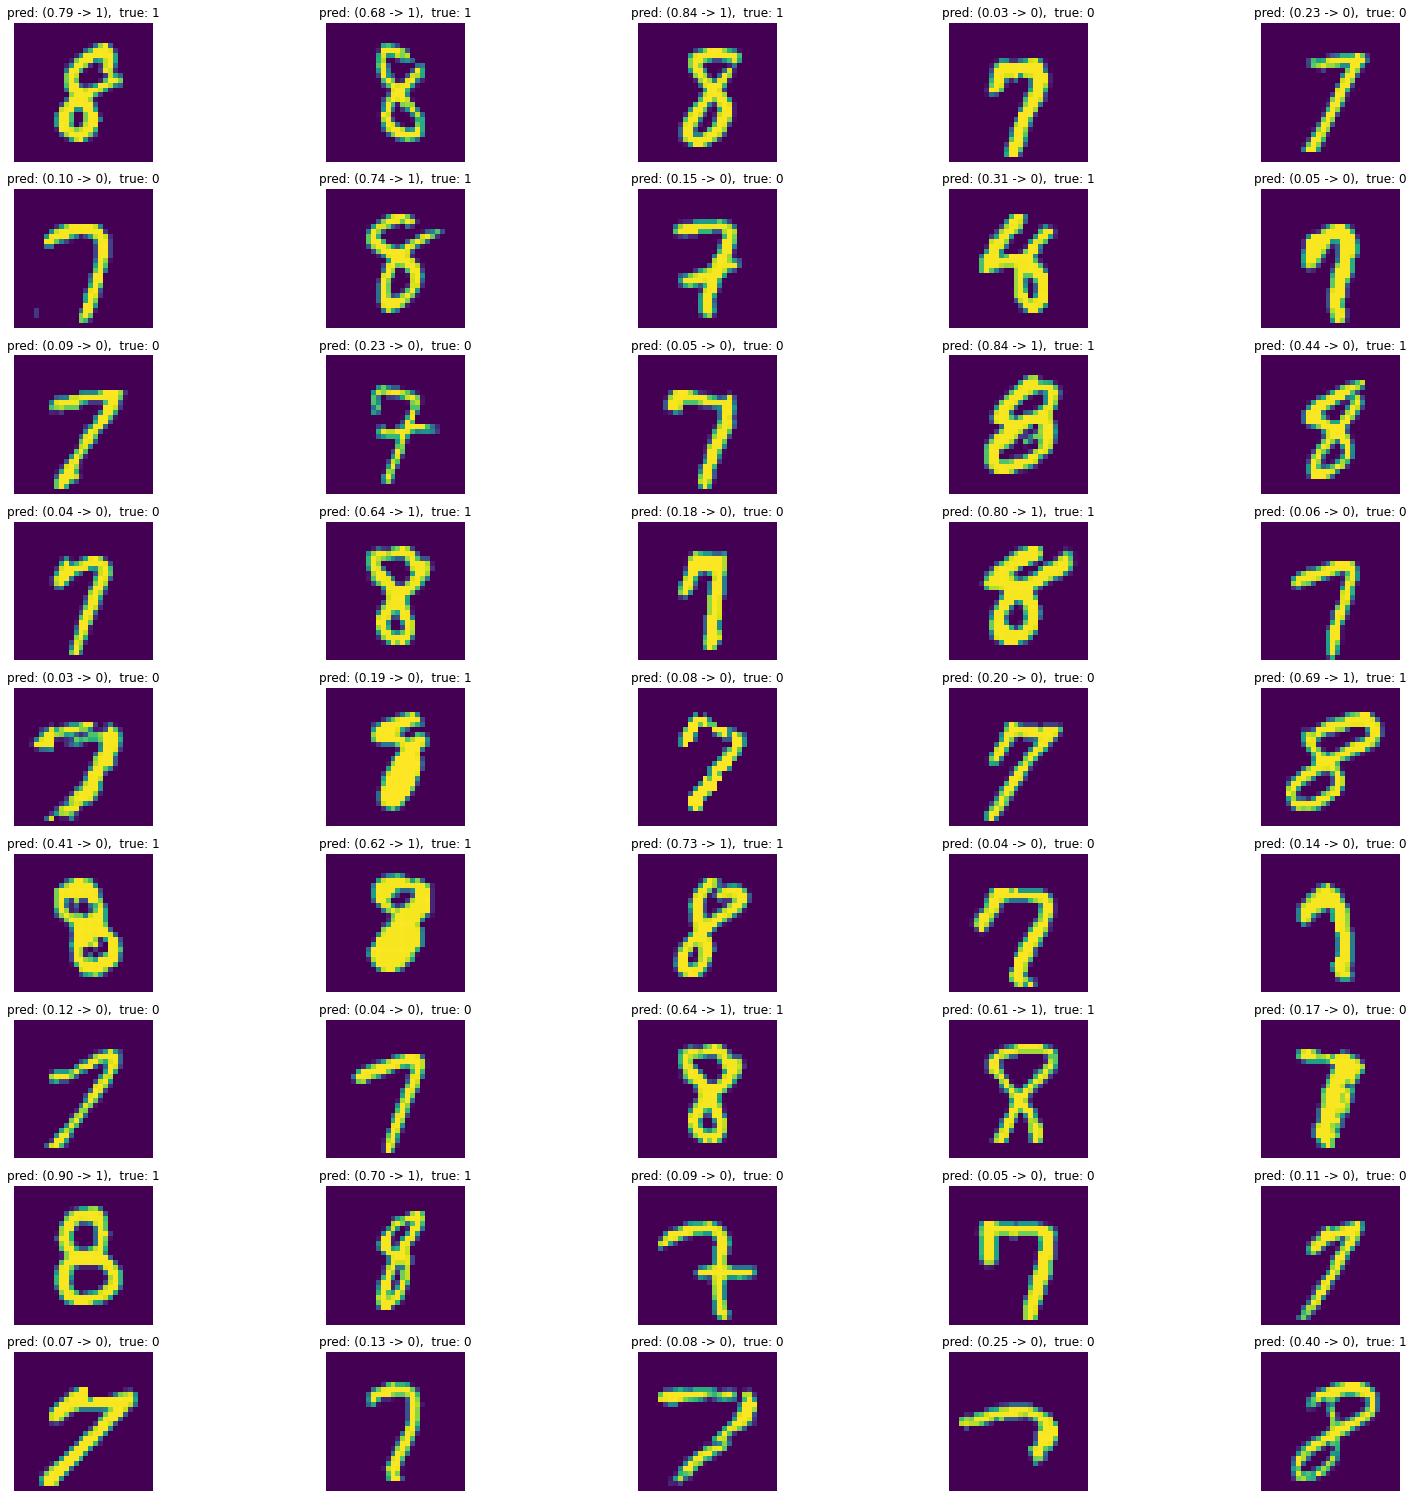

In [430]:
lusi_periphery.visual_validation(45, vis_data)

In [423]:
print("pred: {:.2f}, true: {:.0f}".format(1.2344, 1.0))

pred: 1.23, true: 1


In [431]:
sym_scores = lal.symmetry_boxed(x_train_2d)

In [433]:
sym_scores.shape


(12116,)

In [445]:
def symmetry_boxed(imgs, single=False):
    """Determine symmetry of cropped images.
    
    Assume [0,1]-range for pixels.
    
    """
    if single:
        imgs = np.expand_dims(imgs, axis=0)

    cropped_imgs = lal.determine_box(imgs)
    sym_scores = np.zeros(len(cropped_imgs))
    
    for j in range(len(imgs)):
        sym_scores[j] = lal.symmetry(cropped_imgs[j])
    
    return sym_scores

In [442]:
np.expand_dims(x_train_2d[0], axis=0).shape

(1, 28, 28)

In [447]:
symmetry_boxed(x_train_2d[0], single=True)

array([0.76324733])

In [486]:
dss = small_ds.generate_batch_data(train_only=True)

In [487]:
# dss[0].batch(1).element_spec[0][0].shape[2]
dss[0].element_spec[0][0].shape[1]

3

In [491]:
bce = tf.keras.losses.BinaryCrossentropy()

In [498]:

np.expand_dims(y_train, axis=1).shape

(12116, 1)

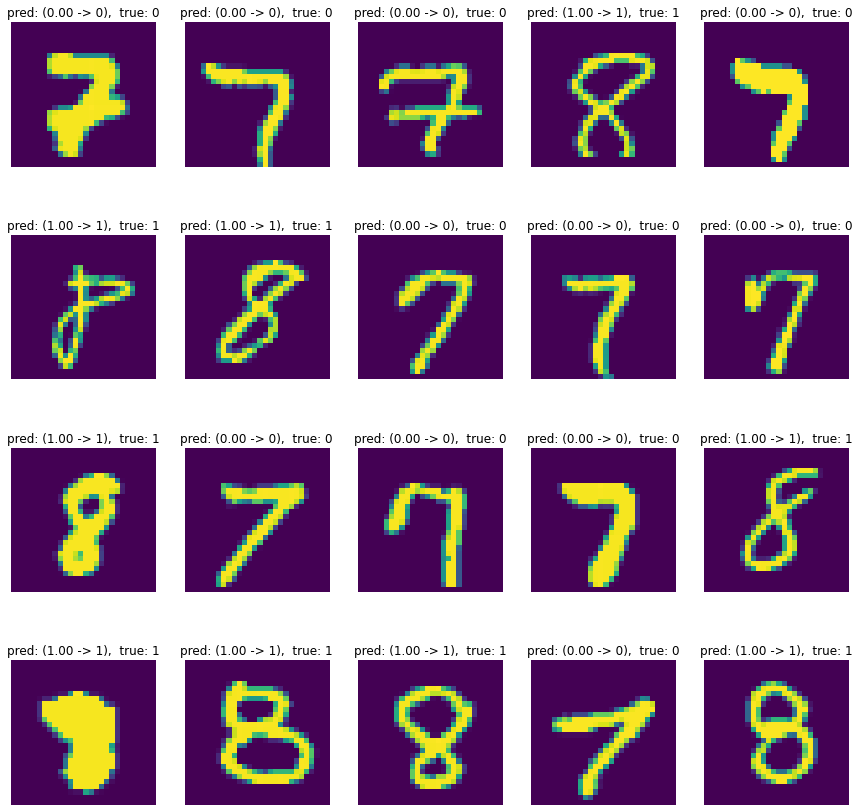

In [499]:
lusi_periphery.visual_validation(20, (x_train_2d, y_train, np.expand_dims(y_train, axis=1)))

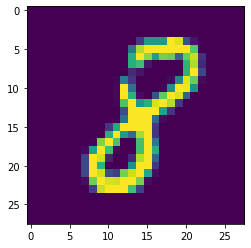

In [500]:
plt.imshow(x_train_2d[20])

In [10]:
import scipy.ndimage as ndimage

In [675]:
im_7_test = x_train_2d[-30]

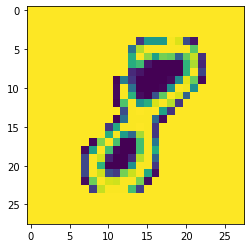

In [676]:
plt.imshow(x_train_2d[20] - ndimage.binary_fill_holes(x_train_2d[20]))

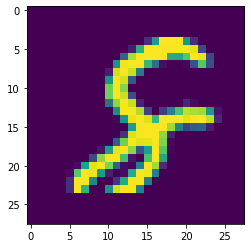

In [677]:
im_8_test = x_train_2d[40]
plt.imshow(im_8_test)

In [678]:
im_8_test_bin = im_8_test > 0.15
im_7_test_bin = im_7_test > 0.15

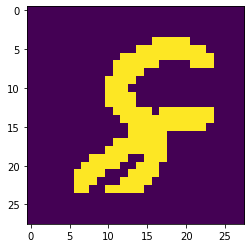

In [679]:
plt.imshow(im_8_test_bin)

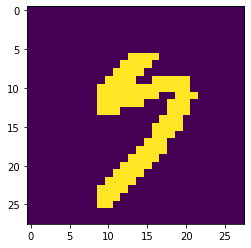

In [680]:
plt.imshow(im_7_test_bin)

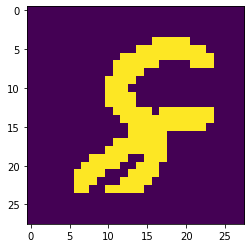

In [681]:
plt.imshow(ndimage.binary_fill_holes(im_8_test_bin))

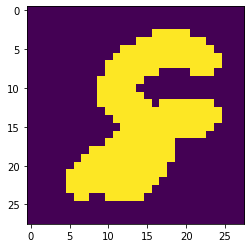

In [682]:
plt.imshow(ndimage.binary_dilation(im_8_test_bin))

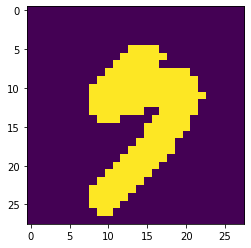

In [683]:
plt.imshow(ndimage.binary_dilation(im_7_test_bin))

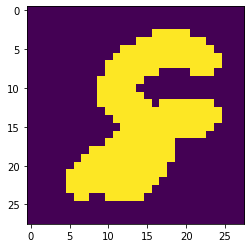

In [684]:
plt.imshow(ndimage.binary_fill_holes(ndimage.binary_dilation(im_8_test_bin)))

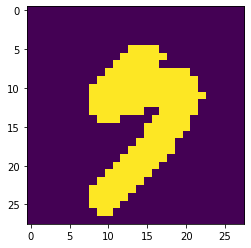

In [685]:
plt.imshow(ndimage.binary_fill_holes(ndimage.binary_dilation(im_7_test_bin)))

In [534]:
type(ndimage.binary_fill_holes(ndimage.binary_dilation(im_8_test_bin)))
# im_8_test_bin

numpy.ndarray

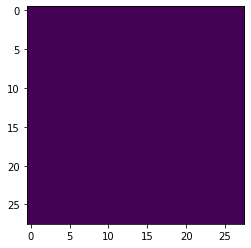

In [686]:
plt.imshow(ndimage.binary_fill_holes(ndimage.binary_dilation(im_8_test_bin)).astype(int) - ndimage.binary_dilation(im_8_test_bin))

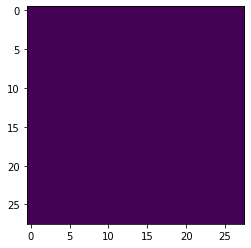

In [687]:
plt.imshow(ndimage.binary_fill_holes(ndimage.binary_dilation(im_7_test_bin)).astype(int) - ndimage.binary_dilation(im_7_test_bin))

In [672]:
diff_im_7 = ndimage.binary_fill_holes(ndimage.binary_dilation(im_7_test_bin)).astype(int) - ndimage.binary_dilation(im_7_test_bin)

In [604]:
diff_im = ndimage.binary_fill_holes(ndimage.binary_dilation(im_8_test_bin)).astype(int) - ndimage.binary_dilation(im_8_test_bin)

In [605]:
diff_im_ind = np.where(diff_im > 0)

In [673]:
diff_im_7_ind = np.where(diff_im_7 > 0)

In [674]:
diff_im_7_ind

(array([14]), array([13]))

In [623]:
diff_im_ind = list(diff_im_ind)

In [648]:
te = list(zip(diff_im_ind[0], diff_im_ind[1]))

In [652]:
for coord in te:
    print(coord)

(8, 15)
(8, 16)
(8, 17)
(8, 18)
(9, 15)
(9, 16)
(9, 17)
(10, 15)
(18, 12)
(19, 11)
(19, 12)


In [643]:
for i in te:
    print(i)

(8, 15)
(8, 16)
(8, 17)
(8, 18)
(9, 15)
(9, 16)
(9, 17)
(10, 15)
(18, 12)
(19, 11)
(19, 12)


In [653]:
len(list(te))

11

In [658]:
te

[(8, 15),
 (8, 16),
 (8, 17),
 (8, 18),
 (9, 15),
 (9, 16),
 (9, 17),
 (10, 15),
 (18, 12),
 (19, 11),
 (19, 12)]

In [659]:
te = [np.asarray(t) for t in te]
te

[array([ 8, 15]),
 array([ 8, 16]),
 array([ 8, 17]),
 array([ 8, 18]),
 array([ 9, 15]),
 array([ 9, 16]),
 array([ 9, 17]),
 array([10, 15]),
 array([18, 12]),
 array([19, 11]),
 array([19, 12])]

In [671]:
hole_count = 0
for i in range(len(te) - 1):
    e1 = te[i]
    e2 = te[i+1]
    print(e1 - e2)
    print(f"Min between to consecutive {np.min(np.abs(e1-e2))}")
    if np.min(np.abs(e1-e2)) > 1:
        print(f"Hole detected {e1-e2}")

[ 0 -1]
Min between to consecutive 0
[ 0 -1]
Min between to consecutive 0
[ 0 -1]
Min between to consecutive 0
[-1  3]
Min between to consecutive 1
[ 0 -1]
Min between to consecutive 0
[ 0 -1]
Min between to consecutive 0
[-1  2]
Min between to consecutive 1
[-8  3]
Min between to consecutive 3
Hole detected [-8  3]
[-1  1]
Min between to consecutive 1
[ 0 -1]
Min between to consecutive 0


In [655]:

te

[(8, 15),
 (8, 16),
 (8, 17),
 (8, 18),
 (9, 15),
 (9, 16),
 (9, 17),
 (10, 15),
 (18, 12),
 (19, 11),
 (19, 12)]

In [894]:
# imgs
rd_num = np.random.randint(0, 5000, 1)
sev = x_train_2d[-rd_num][0]
eig = x_train_2d[rd_num][0]
print(f"Label for sev: {y_train[-rd_num]}")
print(f"Label for eig: {y_train[rd_num]}")


Label for sev: [0.]
Label for eig: [1.]


(-0.5, 27.5, 27.5, -0.5)

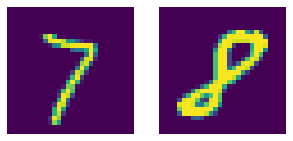

In [884]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
ax[0].imshow(sev)
ax[0].axis("off")
ax[1].imshow(eig)
ax[1].axis("off")

(-0.5, 27.5, 27.5, -0.5)

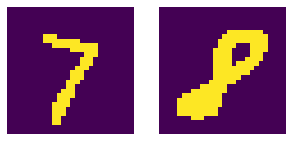

In [885]:
sev_bin = sev > 0.15
eig_bin = eig > 0.15
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
ax[0].imshow(sev_bin)
ax[0].axis("off")
ax[1].imshow(eig_bin)
ax[1].axis("off")

(-0.5, 27.5, 27.5, -0.5)

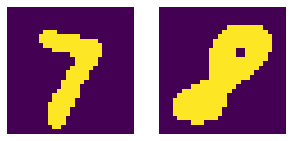

In [886]:
sev_dil = ndimage.binary_dilation(sev_bin)
eig_dil = ndimage.binary_dilation(eig_bin)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
ax[0].imshow(sev_dil)
ax[0].axis("off")
ax[1].imshow(eig_dil)
ax[1].axis("off")

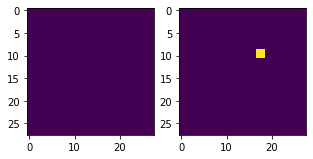

In [887]:
sev_hole_diff = ndimage.binary_fill_holes(sev_dil).astype(float) - sev_dil.astype(float)
eig_hole_diff = ndimage.binary_fill_holes(eig_dil).astype(int) - eig_dil.astype(int)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
ax[0].imshow(sev_hole_diff)
# ax[0].axis("off")
ax[1].imshow(eig_hole_diff)
# ax[1].axis("off")                                    

In [888]:
sev_hole_diff_ind = list(np.where(sev_hole_diff > 0))
eig_hole_diff_ind = list(np.where(eig_hole_diff > 0))
sev_hole_coord = list(zip(sev_hole_diff_ind[0], sev_hole_diff_ind[1]))
eig_hole_coord = list(zip(eig_hole_diff_ind[0], eig_hole_diff_ind[1]))
sev_hole_coord = [np.asarray(c) for c in sev_hole_coord]
eig_hole_coord = [np.asarray(c) for c in eig_hole_coord]


In [889]:
sev_hole_count = 0
eig_hole_count = 0

for i in range(len(sev_hole_coord) - 1):
    if i == 0: sev_hole_count += 1
    e1 = sev_hole_coord[i]
    e2 = sev_hole_coord[i+1]
    # print(e1 - e2)
    # print(f"Min between to consecutive {np.min(np.abs(e1-e2))}")
    if (abs(e2[0] - e1[0]) > 1) or ((abs(e2[0]- e1[0]) > 1) and (abs(e2[1] - e1[1]) > 1)):
        sev_hole_count += 1

for i in range(len(eig_hole_coord) - 1):
    if i == 0: eig_hole_count += 1
    e1 = eig_hole_coord[i]
    e2 = eig_hole_coord[i+1]
    
    if (abs(e2[0] - e1[0]) > 1) or ((abs(e2[0]- e1[0]) > 1) and (abs(e2[1] - e1[1]) > 1)):
        eig_hole_count += 1

print(sev_hole_count)
print(eig_hole_count)

0
1


In [8]:
def determine_holes(img, thresh=0.15):
    img_bin = img > thresh
    img_dil = ndimage.binary_dilation(img_bin)
    img_hole_diff = ndimage.binary_fill_holes(img_dil).astype(int) - img_dil.astype(int)
    img_hole_diff_ind = list(np.where(img_hole_diff > 0))
    img_hole_coord = list(zip(img_hole_diff_ind[0], img_hole_diff_ind[1]))
    img_hole_coord = [np.asarray(c) for c in img_hole_coord]
    
    img_hole_count = 0
    
    for i in range(len(img_hole_coord) - 1):
        if i == 0: img_hole_count += 1
        
        e1 = img_hole_coord[i]
        e2 = img_hole_coord[i+1]

        if (abs(e2[0] - e1[0]) > 1) or ((abs(e2[0]- e1[0]) > 1) and (abs(e2[1] - e1[1]) > 1)):
            img_hole_count += 1
            
    return img_hole_count

In [25]:
def determine_holes(img, thresh=0.15):
    img_bin = img > thresh
    img_dil = ndimage.binary_dilation(img_bin)
    
    img_hole_diff = ndimage.binary_fill_holes(img_dil).astype(int) - img_dil.astype(int)
    img_hole_diff_alt = ndimage.binary_fill_holes(img_bin).astype(int) - img_bin.astype(int)
    
    
    img_hole_diff_ind = list(np.where(img_hole_diff > 0))
    img_hole_diff_alt_ind = list(np.where(img_hole_diff_alt > 0))
    
    img_hole_coord = list(zip(img_hole_diff_ind[0], img_hole_diff_ind[1]))
    img_hole_coord = [np.asarray(c) for c in img_hole_coord]
    
    img_hole_coord_alt = list(zip(img_hole_diff_alt_ind[0], img_hole_diff_alt_ind[1]))
    img_hole_coord_alt = [np.asarray(c) for c in img_hole_coord_alt]
    
    img_hole_count = 0
    img_hole_count_alt = 0
    
    for i in range(len(img_hole_coord) - 1):
        if i == 0: img_hole_count += 1
        
        e1 = img_hole_coord[i]
        e2 = img_hole_coord[i+1]

        if (abs(e2[0] - e1[0]) > 1) or ((abs(e2[0]- e1[0]) > 1) and (abs(e2[1] - e1[1]) > 1)):
            img_hole_count += 1
    
    for i in range(len(img_hole_coord_alt) - 1):
        if i == 0: img_hole_count_alt += 1

        e1 = img_hole_coord_alt[i]
        e2 = img_hole_coord_alt[i+1]

        if (abs(e2[0] - e1[0]) > 1) or ((abs(e2[0]- e1[0]) > 1) and (abs(e2[1] - e1[1]) > 1)):
            img_hole_count_alt += 1
            
    return img_hole_count, img_hole_count_alt

In [7]:
import scipy.ndimage as ndimage

In [26]:

determine_holes(x_train_2d[55])

(0, 2)

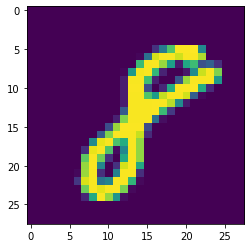

In [10]:
plt.imshow(x_train_2d[55])

In [17]:
eig_sample = x_train_2d[y_train==1][:50]

In [ ]:
holes(eig_sample)

In [18]:
eig_sample.shape

(50, 28, 28)

In [12]:
eights.shape

(5851, 28, 28)

In [46]:
holes = []
for j in range(eights.shape[0]):
    holes.append(determine_holes(eights[j]))
    if j % 100 == 0:
        print(f"{j}: {determine_holes(eights[j])}")
    

0: (0, 2)
100: (1, 1)
200: (2, 2)
300: (0, 2)
400: (1, 2)
500: (1, 2)
600: (1, 2)
700: (1, 2)
800: (0, 0)
900: (1, 2)
1000: (1, 2)
1100: (0, 1)
1200: (2, 2)
1300: (1, 1)
1400: (1, 2)
1500: (0, 2)
1600: (1, 1)
1700: (2, 1)
1800: (2, 1)
1900: (1, 1)
2000: (1, 3)
2100: (1, 2)
2200: (0, 1)
2300: (1, 2)
2400: (2, 2)
2500: (0, 1)
2600: (1, 2)
2700: (1, 1)
2800: (2, 2)
2900: (2, 1)
3000: (1, 2)
3100: (0, 2)
3200: (2, 2)
3300: (2, 1)
3400: (2, 2)
3500: (1, 2)
3600: (2, 2)
3700: (2, 2)
3800: (0, 2)
3900: (2, 2)
4000: (2, 2)
4100: (2, 2)
4200: (2, 2)
4300: (2, 2)
4400: (2, 1)
4500: (2, 2)
4600: (1, 2)
4700: (0, 1)
4800: (1, 0)
4900: (2, 2)
5000: (1, 2)
5100: (1, 0)
5200: (2, 2)
5300: (2, 2)
5400: (1, 2)
5500: (1, 2)
5600: (1, 2)
5700: (2, 2)
5800: (1, 2)


In [47]:
holes = np.asarray(holes)

In [49]:
np.mean(holes[:, 0])

1.2469663305417877

In [50]:
np.mean(holes[:, 1])

1.7060331567253462

In [60]:
holes[holes[:, 0]>1]

array([[2, 2],
       [2, 3],
       [2, 2],
       ...,
       [2, 2],
       [2, 2],
       [2, 2]])

In [41]:
holes.shape

(5851, 2)

In [52]:
holes_seven = []
for j in range(sevens.shape[0]):
    holes_seven.append(determine_holes(sevens[j]))
    if j % 100 == 0:
        print(f"{j}: {determine_holes(sevens[j])}")
holes_seven = np.asarray(holes_seven)

0: (0, 0)
100: (0, 0)
200: (0, 0)
300: (0, 0)
400: (0, 0)
500: (0, 0)
600: (0, 0)
700: (0, 0)
800: (0, 0)
900: (0, 0)
1000: (0, 0)
1100: (0, 0)
1200: (0, 0)
1300: (0, 0)
1400: (0, 0)
1500: (0, 0)
1600: (0, 0)
1700: (0, 0)
1800: (0, 0)
1900: (0, 0)
2000: (0, 0)
2100: (0, 0)
2200: (0, 0)
2300: (0, 0)
2400: (0, 0)
2500: (0, 0)
2600: (0, 0)
2700: (0, 0)
2800: (0, 0)
2900: (0, 0)
3000: (0, 0)
3100: (0, 0)
3200: (0, 0)
3300: (0, 0)
3400: (0, 0)
3500: (0, 0)
3600: (0, 0)
3700: (0, 0)
3800: (0, 0)
3900: (0, 0)
4000: (0, 0)
4100: (0, 0)
4200: (0, 0)
4300: (0, 0)
4400: (0, 0)
4500: (0, 0)
4600: (0, 0)
4700: (0, 0)
4800: (0, 0)
4900: (0, 0)
5000: (0, 0)
5100: (0, 0)
5200: (0, 0)
5300: (0, 0)
5400: (0, 0)
5500: (0, 0)
5600: (0, 0)
5700: (0, 0)
5800: (0, 0)
5900: (0, 0)
6000: (0, 0)
6100: (0, 0)
6200: (0, 0)


In [55]:
np.mean(holes_seven[:, 1])

0.008938547486033519

In [56]:
np.mean(holes_seven[:, 0])

0.03304070231444533

In [58]:
holes_seven[holes_seven[:, 0]>0].shape

(184, 2)

In [59]:
holes_seven[holes_seven[:, 1]>0].shape

(49, 2)

Saving and loading model weights

In [65]:
ws = baseline_bin_class.get_weights()

In [66]:
lusi_net = lal.LusiModel(tf.Variable(np.diag(np.ones(4))))

In [67]:
lusi_net.model.set_weights(ws)

In [72]:

ls_ws = lusi_net.model.get_weights() == baseline_bin_class.get_weights()[0]

/var/folders/w_/7mmc855j2mx35cyh7grs9zsc0000gp/T/ipykernel_87611/3336340095.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ls_ws = lusi_net.model.get_weights() == baseline_bin_class.get_weights()[0]
/var/folders/w_/7mmc855j2mx35cyh7grs9zsc0000gp/T/ipykernel_87611/3336340095.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  ls_ws = lusi_net.model.get_weights() == baseline_bin_class.get_weights()[0]


In [73]:
ls_ws

False

In [85]:
"erm" in {"model", "erm"}

True

In [91]:
a = (100, )[0]

In [92]:
a

100

In [93]:
df

NameError: name 'df' is not defined

In [94]:
df = pd.DataFrame(columns=["a", "b"])

In [95]:
df

,a,b


In [96]:
df[["result_1", "result_2", "result_3"]] = None

In [104]:
df["test"+str(123)] = None

In [105]:
df

,a,b,result_1,result_2,result_3,test123


In [98]:
resss = [0.7, 0.3, 0.4]

In [106]:
dct = {"a" : 1, "b":2}

In [108]:
dct["test"+str(2)] = 44


In [109]:
dct

{'a': 1, 'b': 2, 'test2': 44}

In [111]:
i = 2323

In [113]:

dct[f"metric{i}"] = 434

In [114]:
dct

{'a': 1, 'b': 2, 'test2': 44, 'metric2323': 434}

In [115]:
lal.eval_metrics

In [116]:
df_expand = [f"{metric[0]}_{i+1}" for i, metric in enumerate(lal.eval_metrics)]

TypeError: 'BinaryAccuracy' object is not subscriptable

In [120]:
lal.eval_metrics[0].name

'Binary Accuracy'

In [121]:
no_of_runs = 3

In [124]:
df_expand = [f"{metric.name}_{i+1}" for i in range(no_of_runs) for metric in lal.eval_metrics]

In [125]:
df_expand

['Binary Accuracy_1',
 'False Positives_1',
 'False Negatives_1',
 'Precision_1',
 'Recall_1',
 'Binary Accuracy_2',
 'False Positives_2',
 'False Negatives_2',
 'Precision_2',
 'Recall_2',
 'Binary Accuracy_3',
 'False Positives_3',
 'False Negatives_3',
 'Precision_3',
 'Recall_3']